**Autor:** Dominik Borovský, 2024, PF UPJŠ v Košiciach
***

# Práca s dátami v Sagi

V tomto pracovnom liste sa naučíte:
- ako môžete so Sagom spracovať dáta z merania
- ako vhodne vizualizovať dáta z opakovaných meraní v podobe _error bar_ grafov

# Vzorová situácia - meranie tuhosti pružiny $k$

## Teoretické pozadie

Na odmeranie pružnosti možno použitiť známu závislosť pre veľkosť sily $F$ potrebnej na natiahnutie o pružiny $x$:

$$F = kx$$

kde:
- $F$ je veľkosť pôsobiacej sila v $\mathrm{N}$
- $k$ je tuhosť pružiny v $\mathrm{N/m}$
- $x$ je predĺženie pružiny v $\mathrm{m}$

## Ako by mohlo vyzerať meranie

Počas merania by ste pružinu pripevnenú na silomer postupne naťahovali tak, že by dosiahla určitú dĺžku (napr. dĺžky $1~\mathrm{cm}$, $2~\mathrm{cm}$, ... , $10~\mathrm{cm}$). Pre každú z dĺžok by ste robili meranie 10-krát. Celkový počet nameraných hodnôt by bol potom $10\times10=100~\mathrm{meraní}$.

<a href="https://postimages.org/" target="_blank"><img style="display: block; margin-left: auto; margin-right: auto;" src="https://i.postimg.cc/rwv68XJ7/suspension-spring-car.webp" alt="suspension-spring-car" width="70%" border="0" /></a>

<!-- <a href="https://postimages.org/" target="_blank"><img style="display: block; margin-left: auto; margin-right: auto;" src="https://i.postimg.cc/rwv68XJ7/suspension-spring-car.webp" alt="suspension-spring-car" width="70%" border="0" /></a> -->

<p style="text-align: center;">Obr. 1: Tlmič v aute</p>
<p style="text-align: center;"><sub><em>(zdroj: https://www.airedalesprings.co.uk/blog/choosing-the-best-materials-for-springs/)</em></sub></p>

## Prečo by nás to mohlo zaujímať

Tuhosť pružiny je kľúčovým parametrom pre tlmiče v autách (ktoré nie sú nič iné ako veľké pružiny), ktorý určuje, aká pohodlná bude naša jazda po nespevnených cestách alebo cestných komunikáciách v dezolátnom stave.


# Príprava

V niektorých poskytnutých dokumentoch uvidíte túto bunku, ktorá nerobí nič iné, ako načíta niektoré dodatočné príkazy, ktoré sme pre vás pripravili. Sú dostupné na našom Githube [JupyterPER/SageMathApplications: our own codes and packages using SageMath](https://github.com/JupyterPER/SageMathApplications).

In [1]:
# inštalácia knižnice pandas
# ak ešte nebola nainštalovaná alebo nie ste v html stránke, odkomentujte nasledujúci riadok
# !pip install pandas

In [2]:
# sem načítame niektoré užitočné príkazy z nášho GitHub úložiska
url = "https://raw.githubusercontent.com/JupyterPER/SageMathApplications/refs/heads/main/SageMathCellUtils.sage"
load(url)

SageMathCellUtils loaded!


# Načítanie, kontrola a úprava dát

## Načítanie dát

Najpriamočiarejšie je načítanie a spracovanie ďalšie spracovanie dát pomocou knižnice `pandas`. Ak pracuje priamo v Jupyter Notebooku, môžete ich načítať pomocou nasledujúcich príkazov:

In [3]:
# načítanie knižnice pandas
import pandas as pd


# načítanie dát z csv súborov - odkomentujte, ak máte k dispozícii dáta
data = pd.read_csv("hooks_law_data.csv")
data

,x [cm],F [N]
0,1,4.190526
1,1,2.034063
2,1,2.532820
3,1,2.907516
4,1,1.711077
...,...,...
95,10,24.944133
96,10,27.259947
97,10,25.869039
98,10,24.657883


> _**Poznámka:**_ Ako argumenty pre `read_excel`, resp. `read_csv` sa uvádzajú názvy súborov, resp. celá cesta k súborom v podpriečinkoch v tvare `cesta/k/priecinku/nazov_suboru.csv`. Ak chcete použiť read_excel, je možné, že okrem knižnice `pandas` potrebujete nainštalovanú aj knižnicu `openpyxl` (priamo v bunke spustením `!pip install openpyxl`).
> 
> _**Ak pracujete s jednou z naších HTML stránok:**_ Tento dokument, čo do výpočtov, funguje čisto na cloudovej báze, t.j. vaše výpočty sa posielajú na server, ktorý váš vstup spracuje a pošle vám naspäť len výsledok. Posielať namerané dáta na cloud môžete v textovej podobe. Najjednoduchšie je:
> 1. namerané dáta uložiť v csv tabuľke
> 2. csv súbor otvoriť v textovom editore (pravým klik na súbor $\rightarrow$ Otvoriť v programe $\rightarrow$ Poznámkový blok alebo napr. [Notepad++](https://notepad-plus-plus.org/))
> 3. vybrať všetky dáta a skopírovať si ich (cez `Ctrl+A` a `Ctrl+C`)
> 4. prilepiť ich do bunky ako multriadkový python reťazec medzi `""" """`

Tu je ukážka výsledku tejto "copy/paste" metódy. 

Dáta načítané v pandas sa transformujú na `DataFrame`, čo je ako Python verzia tabuľky v Exceli:

- Má riadky a stĺpce
- Obsahuje dáta rôznych typov
- Umožňuje ľahko pracovať s údajmi

Je to užitočný nástroj na organizáciu a analýzu dát v Pythone.

Pre správne načítanie dát do `DataFrame`-u musí byť v prvom riadku tabuľky hlavička s popisom a v ďalších riadkov sa musia nachádzať už namerané hodnoty. Ako všade v Sagi alebo aj Pythone všeobecne, číselné dáta majú **desatinnú bodku miesto desatinnej čiarky**. 

## Kontrola dát

Často je potrebná obozretnosť, či vaše dáta neobsahujú prázdne riadky, alebo nie sú úplné. Jednoduchú kontrolu môžeme urobiť pomocou `.info()`

In [4]:
# jednoduchá kontrola dát
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x [cm]  100 non-null    int64  
 1   F [N]   100 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


Z reportu získaného pomocou `.info()` vieme vyčítať, že:

- naša tabuľka obsahuje dva stĺpce s názvami `x [cm]` a `F [N]`
- každý stĺpec obsahuje po 100 _"non-null"_ hodnôt - tým sa nemyslí, že v nameraných hodnotách nie sú 0, ale že sa v nich nenachádzajú žiadne prázdne riadky, čo by malo za následok, že sa v nich objaví hodnota `NaN` (_Not a Number_, teda chýbajúca hodnota)
- dáta v stĺpci `x [cm]` sú typu `int64`, t.j. celé čísla `integer`, a dáta v stĺpci `F [N]` sú typu `float64`, t.j. desatinné čísla (_floating-point number_, čísla s "plávajúcou" desatinnou čiarkou)

 V tomto prípade sa zdá, že dáta sú v poriadku. Poďme to trochu pokaziť a pozrieť sa na to, ako chyby v dátach detekovať.

In [5]:
# surové data z csv tabuľky v podobe textu
csv_data_pokazene = """
x [cm],F [N]
1,4.190525703800356
1,2.034062629459167
1,2.5328201636785845
1,2.9075162829965078
1,1.7110769713742613
1,2.502065572905948
1,2.4991096141420686
1,0.7452756936545792
1,3.517658005663493
1,3.1004985159195493
2,4.37457102603324
2,4.8284517388042785
2,5.505299374196752
2,4.738643584808353
2,4.757250921327453
2,3.5467585875092094
2,5.554580311891888
2,5.123880905287038
2,5.274459923759964
2,3.47347546813016
3,9.150699691186475
,7.654335535456358
3,7.112860056713612
3,9.529072220761112
3,7.454613970139354
3,6.049321300853425
3,7.094772144572313
3,5.2116848980282775
3,8.549396549343255
3,7.083525681479982
4,9.257446474795433
4,11.072470131575496
4,8.348924410594162
4,10.535429356326091
4,7.935585196878824
4,9.33784066033319
4,8.795780154400267
4,11.461975627213524
4,11.766160877929334
4,9.670586248086934
5,9.670586248086934
5,12.32001359874765
5,13.068061887327982
5,11.747162803578535
5,10.791660796832945
5,10.69690134152026
5,12.883121851757512
5,14.7475950528077
5,12.769411630507888
5,11.975395380599148
6,16.91201886233194
6,15.237301846637193
6,15.101433985211616
6,15.252577735555317
6,14.867622802433154
6,14.69052365941112
6,13.565036533964445
6,15.50162412318104
6,14.905224549560106
6,16.19308592234401
7,17.131181531552155
7,15.593630121469532
7,17.400389368105134
7,19.19953729674668
7,17.11657687706849
7,16.61014313897925
7,16.306408077741818
7,16.449983188924627
7,17.199806263199836
7,16.320017906541796
8,21.497639115597583
8,19.71736476392462
8,20.10864837149473
8,21.438239520733756
8,21.50331852041691
8,19.787267032982438
8,20.331974215488497
8,20.73502658437736
8,19.80714453965022
8,18.221987147041492
9,23.15470570370311
9,23.394352304820533
,22.91550261429801
9,21.57645534328678
9,22.303972687692035
9,21.909230181136863
9,22.200288762672173
9,23.796885192726673
9,24.029579633393155
9,23.169418193409662
10,25.548745119778328
10,25.676628989555887
10,24.987757813393557
10,24.924336538512932
10,24.326354812623926
10,24.944132549949927
10,27.25994698662626
10,25.869039329253827
10,24.657882976573138
10,24.528073347866478
"""

In [6]:
data_pokazene = pd.read_csv(io.StringIO(csv_data_pokazene.strip()))

# zobrazenie tabulky
data_pokazene.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x [cm]  98 non-null     float64
 1   F [N]   100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


Z reportu s pokazenými dátami vieme vyčítať, že:

- v stĺpci `x [cm]` máme tentokrát 98 _"non-null"_ hodnôt, teda v nejakých riadkoch chýba hodnota (zároveň sa zmenil typ na `float`, a to kvôli výskytu `NaN`)

V nasledujúcich bunkách je ukážka, ako zistiť, kde sú chýbajúce dáta.

In [7]:
# zratanie NaN hodnôt v stĺpci 'x [cm]'
data_pokazene['x [cm]'].isna().value_counts()

False    98
True      2
Name: x [cm], dtype: int64

In [8]:
# riadky s NaN hodnotami
data_pokazene.loc[data_pokazene['x [cm]'].isna(), :]

,x [cm],F [N]
21,NaN,7.654336
82,NaN,22.915503



V predošlej bunke sme odfiltrovali len tie riadky, ktoré v stĺpci `x [cm]` obsahovali `NaN`. Rozberme si daný kód:

1. `data_pokazene` - názov `DataFrame`-u, s ktorým pracujeme.

2. `.loc[]` - metóda na prístup k riadkom a stĺpcom `DataFrame`-u pomocou názvov alebo booleovských podmienok.

3. `data_pokazene['x [cm]'].isna()` - táto časť vytvára zoznam hodnôt `True` alebo `False`:
   - `data_pokazene['x [cm]']` vyberá stĺpec s názvom "x [cm]"
   - `.isna()` kontroluje, ktoré hodnoty v tomto stĺpci sú NaN (chýbajúce hodnoty)

4. `:`  - dvojbodka za čiarkou znamená, že chceme vybrať všetky stĺpce (môžeme špecifikovať, ktoré stĺpce sa zobrazia, napr. len jeden stĺpce `'x [cm]'`, alebo len časť stĺpcov daná zoznamom `['x [cm]', 'F [N]]`)

> _**Poznámka:**_ Tak, ako indexovanie zoznamov v Pythone začína nulou, takisto aj v pandas `DataFrame` číslovanie riadkov začína nulou, napr. v našom prípade riadok s indexom 21 je v poradí 22.-hý.

## Úprava dát

Napokon si ukážeme, ako môžete robiť jednoduché úpravy dát. Napr. predĺženie $x$ bolo namerené v $\mathrm{cm}$ $\rightarrow$ je potrebná premena z $\mathrm{cm}$ na $\mathrm{m}$

In [9]:
# predpripravenie dát - konverzia z cm na m
data["x [m]"] = data["x [cm]"]/100

# zobrazenie vzorky z dát
data.sample(n=10)

,x [cm],F [N],x [m]
10,2,4.374571,0.02
88,9,24.029580,0.09
69,7,16.320018,0.07
55,6,14.690524,0.06
85,9,21.909230,0.09
40,5,13.340733,0.05
90,10,25.548745,0.10
57,6,15.501624,0.06
63,7,19.199537,0.07
46,5,12.883122,0.05


In [10]:
# zobrazenie riadkov v konkrétnom rozsahu
data.loc[17:22, :]

,x [cm],F [N],x [m]
17,2,5.123881,0.02
18,2,5.274460,0.02
19,2,3.473475,0.02
20,3,9.150700,0.03
21,3,7.654336,0.03
22,3,7.112860,0.03


# Jednoduchá vizualizácia dát

Namerané dáta v našom prípade možno vizualizovať v podobe bodov $[x_i,F_i]$ pre $i=1,2,...,100$. Presne takto možno podať dáta Sagu na vykreslenie - v podobe dvojíc.

In [11]:
# vytvorenie zoznamu dvojic v tvare (x_1, F_1), (x_2, F_2)
data_body = list(zip(data["x [m]"], data["F [N]"]))

# vzorka bodov
data_body[17:22]

[(0.02, 5.123880905287038),
 (0.02, 5.274459923759964),
 (0.02, 3.47347546813016),
 (0.03, 9.150699691186476),
 (0.03, 7.654335535456358)]

> **Poznámka:** Funkcia `zip()`, navzájom spojí odpovedajúce si hodnoty do dvojíc (podobne ako to robí zips). Následne `list()` premení tento "zips" dvojíc na python zoznam. Takýto zoznam si môžete zadať aj ručne, napr. `[[1,4], [2, 3.5], ...]`

Okrem príkazu `plot()`, s ktorým ste sa mohli stretnúť pri vykresľovaní matematických, sú v Sagi dostupné aj iné príkazy. Na vykresľovanie bodov možno použiť príkaz `points()`. Ak by ste mali zoznam bodov, ktoré by ste chceli pospájať čiarou, môžete použiť príkaz `line()`

In [12]:
# prázdny graf - nastavenie formátovania grafu: nadpis, označenie osí pomocou LaTeX-u 
graf_format = plot([], title="Meranie závislosti $F~(x)$", axes_labels = [r"$x~\mathrm{[m]}$", r"$F~\mathrm{[N]}$"], frame=True, gridlines=True)

In [13]:
# vytvorenie grafu pre namerané data - body, xmin, xmax, ymin, ymax nastavujú rozsah zobrazenych osich
graf_merania = points(data_body, xmin=0)

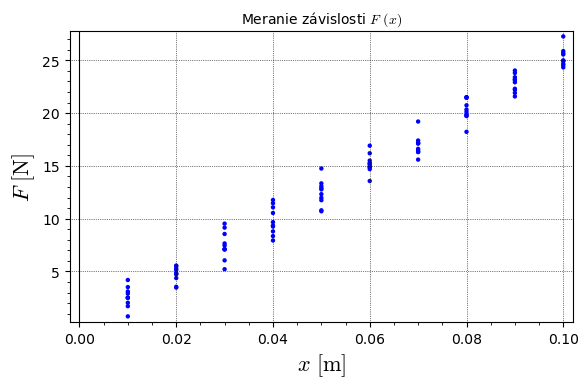

In [14]:
# vysledný graf cez "sčítavanie" grafov
vysledny_graf = graf_merania + graf_format

# zobrazenie vysledneho grafu
vysledny_graf

In [15]:
# uloženie vysledného grafu ako png 
# dpi - nastavenie vysokej kvality obrázku
vysledny_graf.save("graf_meranie.png", dpi=300)

# Pokročilá vizualizácia

Ako bolo sľúbené na začiatku, tu sa dostávame ku vykresľovaniu grafu s _error barmi_. Na to použijeme príkaz `plot_errorbars()`. Na vytvorenie grafu je potrebné zadať dva povinné parametre:

- $x$-ové hodnoty - v našom prípade je sú hodnoty zo stĺpca `'x [m]'` z `DataFrame`-u `data`\
- $y$-ové hodnoty - v našom prípade je sú hodnoty zo stĺpca `'F [N]'` z `DataFrame`-u `data`

> _**Poznámka:**_ Príkaz `plot_errorbars()` je načítaný z našej Github knižnice. Pre detaily môžete pozrieť zdrojový kód cez link v prvej kódovej bunke tohto dokumentu. Pre dodatočné nastavenie grafu môžete pozrieť `help` k príkazu `plot_errorbars`

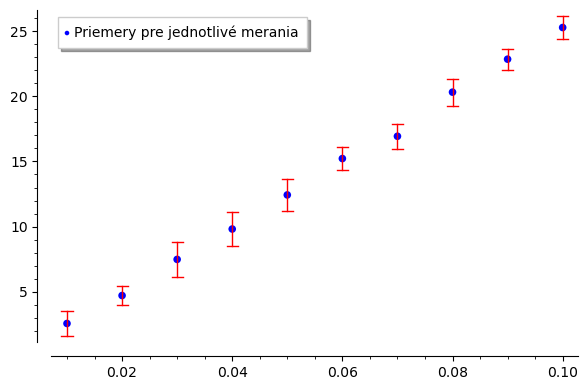

In [16]:
# vykreslenie grafu s error barmi s pridaným popisom do legendy
graf_errorbars = plot_errorbars(data["x [m]"], data["F [N]"], legend_label_mean="Priemery pre jednotlivé merania")
graf_errorbars

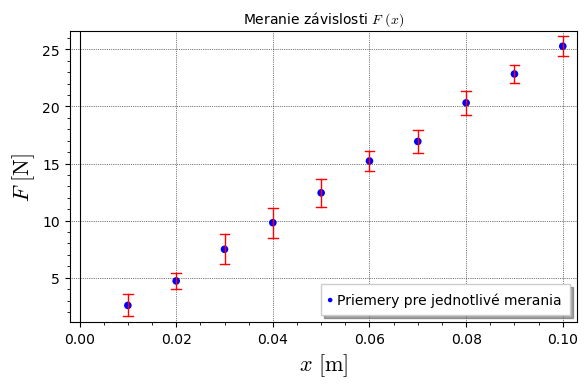

In [17]:
# graf aj s formatovaním
vysledny_graf_errorbars = graf_errorbars + graf_format
vysledny_graf_errorbars.show(xmin=0)

In [18]:
# help k príkazu plot_errorbars
help(plot_errorbars)

Help on function plot_errorbars in module __main__:

plot_errorbars(x_vals, y_vals, color_mean='blue', size_mean=30, marker_mean='o', legend_label_mean=None, color_std='red', thickness_std=1, rel_cap_width_std=0.0100000000000000)
    Create a plot with error bars showing mean and standard deviation.
    
    Parameters:
    x_vals (list): List of x-values
    y_vals (list): List of y-values
    color_mean (str): Color of the mean points (default: 'blue')
    size_mean (int): Size of the mean points (default: 30)
    marker_mean (str): Marker style for mean points (default: 'o')
    legen_label_mean (str): Legend label for mean points (default: None)
    color_std (str): Color of the error bars (default: 'red')
    thickness_std (int): Thickness of the error bars (default: 1)
    rel_cap_width_std (float): Relative width of error bar caps (default: 0.01)
    
    Returns:
    sage.plot.plot.Graphics: A Sage graphics object containing the plot



# Základná štatistika

V tejto časti si ukážeme, ako možno urobiť jednoduchú štatistiku z nameraných dát. Môže sa jednať o určenie priemerov a smerodajných odchýlok pre meranie sily, osobitne pre každú hodnotu dĺžky (čo by nemuselo byť nevyhnutne celkom jednoduché pri práci v Exceli).
  
V nasledujúcej bunke je ukážka, ako takú štatistiku vytvoriť.

In [19]:
# štatistika z dát - priemery a smerodajná odchýlka (std)
stats = data.groupby("x [m]")["F [N]"].agg(["mean", "std"]).reset_index()
stats

,x [m],mean,std
0,0.01,2.574061,0.959454
1,0.02,4.717737,0.733852
2,0.03,7.489028,1.324816
3,0.04,9.818220,1.329139
4,0.05,12.434006,1.215684
5,0.06,15.222645,0.891128
6,0.07,16.932767,0.966070
7,0.08,20.314861,1.030964
8,0.09,22.845039,0.817209
9,0.10,25.272290,0.861696


Táto bunka vykonáva niekoľko operácií na `DataFrame`-e `data`:

1. `data.groupby("x [m]")`: Zoskupuje dáta podľa hodnôt v stĺpci `"x [m]"`.

2. `["F [N]"]`: Vyberie stĺpec `"F [N]"` pre ďalšie operácie.

3. `.agg(["mean", "std"])`: Počíta priemer (`"mean"`) a smerodajnú odchýlku (`"std"`) pre hodnoty `"F [N]"` v každej skupine.

4. `.reset_index()`: Obnoví index výsledného DataFrame-u.

Výsledkom je nový DataFrame `stats`, ktorý obsahuje pre každú unikátnu hodnotu `"x [m]"` priemernú hodnotu a smerodajnú odchýlku `"F [N]"`.

# Fitovanie modelu

Tu už sa blížime do finále, keď určíme hodnotu pružnosti pružiny $k$. Ako naznačuje závislosť $F=kx$, bude potrebné fitovať lineárnu závislosť. Najprv si ju zadefinujeme ako model.

In [20]:
# premenné vystupujúce v modeli - konštanta pružnosti k a predĺženie x
k = var("k")
x = var("x")

# zadefinovanie modelu
F(x) = k*x

# zobrazenie pre kontrolu
show(F)

x |--> k*x

Teraz je potrebné povedať, čo zoberieme ako fitované dáta. Môže sa jednať o celý pôvodný dataset uložený v `data_body` ako množina bodov. Trochu iný prístup môže byť zobrať ako fitované dáta len priemery $F$ pre každú z hodnôt $x$. Vyskúšame to druhou zmienenou cestou. Teda, vytvorme body v tvare $[x,F_{priemer}]$. 

In [21]:
x_F_priemery = list(zip(stats['x [m]'], stats['mean']))
x_F_priemery

[(0.01, 2.5740609153594516),
 (0.02, 4.717737184174834),
 (0.03, 7.489028204853416),
 (0.04, 9.818219913813326),
 (0.05, 12.434005758582316),
 (0.06, 15.222645002062995),
 (0.07, 16.93276737703293),
 (0.08, 20.31486098117076),
 (0.09, 22.845039061713898),
 (0.1, 25.272289846413425)]

Napokon, samotné **fitovanie**. Na to je v Sagi k dispozícii príkaz `find_fit()`, kde ako prvý parameter vystupuje zoznam fitovaných bodov (v našom prípade `x_F_priemery`) a ako druhý parameter fitovaný model, v našom prípade to je sila `F(x)` - $F$ v závislosti od $x$.

In [22]:
# najdenie parametru k, vystup v tvare Python slovnika (dobre sa s nim pracuje)
fit = find_fit(x_F_priemery, F, solution_dict=True)

fit

{k: 251.07322282452083}

> _**Poznámka:**_ Tu sme nastavili aj hodnotu nepovinného parametra `solution_dict` na `True`, čím získame výsledok v tvare python slovníka. Aký bude výstup, `solution_dict` nenastavíte (resp. nastavíte na `False`)?

# Výsledok

Fitovaním k nameraným priemerným hodnotám $F$ sa teda podarilo určiť hodnotu pružnosti pružiny $k~\dot{=}~251~\mathrm{N/m}$. Otázka je, či táto hodnota dobre popisuje namerané dáta. Takže, potrebujeme ešte zobraziť $F(x)$ pre nájdenú hodnotu $k$. Najprv zasubstituujeme nájdenú číselnú hodnotu za symbolickú premennú `k` v skôr definovanom modeli `F(x) = k*x`:

In [23]:
# substitúcia číselnej hodnoty parametra k v pôvodnom modeli 
F_fit(x) = F(x).subs(fit)

# kontrola
F_fit

x |--> 251.07322282452083*x

Napokon, doplnenie funkcie `F_fit` do grafu.

In [24]:
# vykreslenie modelu s najdenym fitom parametra k
stitok_fit = rf"Fit, $k=$ {round(fit[k], 2)} N/m"
graf_fit = plot(F_fit, xmin=0, xmax=0.1, legend_label=stitok_fit, color="green")

> _**Poznámka:**_ Tu sme urobili pokročilejšiu úpravu štítku do legendy pre fitovanú krivku tak, aby sa automaticky načítala fitovaná hodnota ako prvok zo slovnika `fit[k]`, zaokrúhlila sa na 2 desatinné miesta pomocou `round()` a napokon doplnila do python reťazca cez formátovanie reťazca, čo indukuje `f` pred úvodzovkami. `r` tu, ako aj inde v kóde, figuruje pri reťazcoch kvôli peknému vloženiu $\LaTeX$-u.

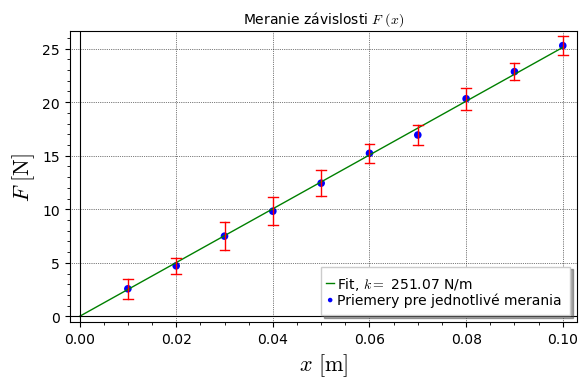

In [25]:
vysledny_graf_fit = graf_fit + graf_errorbars + graf_format
vysledny_graf_fit

In [26]:
# uloženie výsledného grafu
vysledny_graf_fit.save("vysledny_graf_fit.png", dpi=300)

## Záver
Fitovaná priamka s nájdenou hodnotou $k$ dobre popisuje namerané dáta (priamka vždy pretína interval $\mathrm{priemer}\pm\mathrm{smerodajná~odchýlka}$).

> _**Disclaimer:**_ Dáta, s ktorými sme celý čas pracovali, boli náhodne vygenerované a slúžili len na ilustratívne účely, ako spracovať opakované merania takéhoto druhu. 

# Priestor na experimentovanie